<a href="https://colab.research.google.com/github/Zardian18/Cat-Generator-Autoencoder/blob/master/CatGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py

--2024-01-02 00:54:42--  https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13084 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  12.78K  --.-KB/s    in 0s      

2024-01-02 00:54:42 (82.0 MB/s) - ‘helper.py’ saved [13084/13084]



In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d crawford/cat-dataset

100% 4.03G/4.04G [00:34<00:00, 103MB/s] 
100% 4.04G/4.04G [00:34<00:00, 124MB/s]


## Dataset creation

In [8]:
! unzip cat-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cats/CAT_05/00001130_020.jpg  
  inflating: cats/CAT_05/00001130_020.jpg.cat  
  inflating: cats/CAT_05/00001130_023.jpg  
  inflating: cats/CAT_05/00001130_023.jpg.cat  
  inflating: cats/CAT_05/00001130_026.jpg  
  inflating: cats/CAT_05/00001130_026.jpg.cat  
  inflating: cats/CAT_05/00001131_003.jpg  
  inflating: cats/CAT_05/00001131_003.jpg.cat  
  inflating: cats/CAT_05/00001131_026.jpg  
  inflating: cats/CAT_05/00001131_026.jpg.cat  
  inflating: cats/CAT_05/00001132_007.jpg  
  inflating: cats/CAT_05/00001132_007.jpg.cat  
  inflating: cats/CAT_05/00001132_008.jpg  
  inflating: cats/CAT_05/00001132_008.jpg.cat  
  inflating: cats/CAT_05/00001132_014.jpg  
  inflating: cats/CAT_05/00001132_014.jpg.cat  
  inflating: cats/CAT_05/00001132_017.jpg  
  inflating: cats/CAT_05/00001132_017.jpg.cat  
  inflating: cats/CAT_05/00001132_018.jpg  
  inflating: cats/CAT_05/00001132_018.jpg.cat  
  inflating: cats/CAT_05/0000

In [9]:
from helper import walk_through_dir

In [10]:
walk_through_dir("/content/cats")

There are 7 directories and 0 images in '/content/cats'.
There are 0 directories and 1623 images in '/content/cats/CAT_03'.
There are 0 directories and 3515 images in '/content/cats/CAT_02'.
There are 0 directories and 2777 images in '/content/cats/CAT_06'.
There are 0 directories and 3413 images in '/content/cats/CAT_00'.
There are 0 directories and 2793 images in '/content/cats/CAT_04'.
There are 0 directories and 2643 images in '/content/cats/CAT_05'.
There are 0 directories and 3237 images in '/content/cats/CAT_01'.


In [11]:
# import shutil
# import os


# source_dir = "/content/CAT_05"

# destination_dir = "/content/all_cats"

# extension = '.jpg'

# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)

# files = os.listdir(source_dir)

# files_to_copy = [file for file in files if file.endswith(extension)]

# for file_to_copy in files_to_copy:
#     source_path = os.path.join(source_dir, file_to_copy)
#     destination_path = os.path.join(destination_dir, file_to_copy)
#     shutil.copyfile(source_path, destination_path)

# print(f"Files with extension '{extension}' copied from {source_dir} to {destination_dir}.")


In [12]:
import tensorflow as tf
import os

directory_path="CAT_00"

file1= [file for file in os.listdir(directory_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

In [13]:
updated_file1 = ["CAT_00/" + file for file in file1]

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(-0.5, 499.5, 332.5, -0.5)

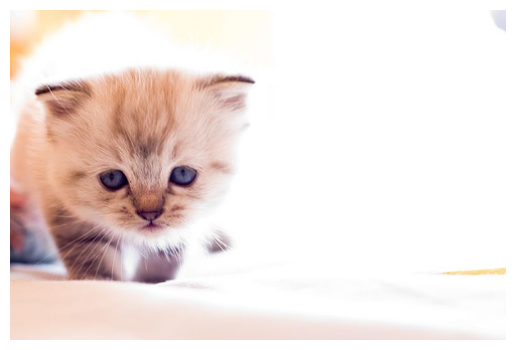

In [15]:
plt.imshow(plt.imread(updated_file1[0])/255)
plt.axis(False)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

images_as_tensors = []

for file in updated_file1:
    img = load_img(file, target_size=(256, 256))
    img_tensor = img_to_array(img)/255.0
    images_as_tensors.append(img_tensor)

In [17]:
images_as_tensors[:5]

[array([[[0.9764706 , 0.972549  , 0.9647059 ],
         [0.98039216, 0.9764706 , 0.96862745],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [0.9019608 , 0.8980392 , 0.92941177],
         [0.8980392 , 0.8980392 , 0.9372549 ],
         [0.89411765, 0.89411765, 0.93333334]],
 
        [[0.972549  , 0.96862745, 0.9607843 ],
         [0.9764706 , 0.972549  , 0.9647059 ],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [0.8980392 , 0.89411765, 0.9254902 ],
         [0.89411765, 0.89411765, 0.93333334],
         [0.8901961 , 0.8901961 , 0.92941177]],
 
        [[0.96862745, 0.9647059 , 0.95686275],
         [0.972549  , 0.96862745, 0.9607843 ],
         [0.9764706 , 0.9764706 , 0.96862745],
         ...,
         [0.8901961 , 0.88235295, 0.9254902 ],
         [0.8862745 , 0.8862745 , 0.93333334],
         [0.88235295, 0.88235295, 0.92941177]],
 
        ...,
 
        [[0.9607843 , 0.85882354, 0.80784315],
         [0.9647059 , 0.8627451 , 0.81176

In [18]:
# del files

In [19]:
# del updated_files

In [20]:
# x_train = tf.data.Dataset.from_tensor_slices(images_as_tensors)

In [21]:
# del images_as_tensors

In [22]:
directory_path = "/content/CAT_00"

In [23]:
# IMG_SIZE=(256,256)
# BATCH_SIZE=32

# train_dirs=directory_path+"/"
# train_dataset=[]

# for train_dir in train_dirs:
#   train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
#                                                                  image_size=IMG_SIZE,
#                                                                  label_mode="binary",
#                                                                  batch_size=BATCH_SIZE)
#   train_dataset.append(train_data)

In [24]:
from helper import display

In [25]:
# display(x_train)

In [26]:
def display2(images_np, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None):
    """
    Displays n random images from each one of the supplied arrays.
    """
    # Convert to NumPy array
    # images_np = images.numpy()

    if images_np.max() > 1.0:
        images_np = images_np / 255.0
    elif images_np.min() < 0.0:
        images_np = (images_np + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images_np[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()


In [27]:
# display2(x_train)

In [28]:
imgs=np.array(images_as_tensors)

In [29]:
imgs[0].shape

(256, 256, 3)

In [30]:
imgs.shape

(1706, 256, 256, 3)

## Encoder

In [31]:
from tensorflow.keras.layers import Flatten, Conv2D, Conv2DTranspose, Input, Dense, Reshape

In [32]:
encoder_input= Input(shape=(256,256,3), name="encoder_input")
x= Conv2D(32, 3, strides=2, activation= "relu", padding="same")(encoder_input)
x= Conv2D(64, 3, strides=2, activation= "relu", padding="same")(x)
x= Conv2D(128, 3, strides=2, activation= "relu", padding="same")(x)
x= Conv2D(256, 3, strides=2, activation= "relu", padding="same")(x)

shape_before_flat= x.shape[1:]
x= Flatten()(x)
encoder_output= Dense(10, name="encoder_output")(x)

encoder= tf.keras.Model(encoder_input, encoder_output)

In [33]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 encoder_output (Dense)      (None, 10)                655370

## Decoder

In [34]:
shape_before_flat

TensorShape([16, 16, 256])

In [35]:
decoder_input = Input(shape=(10,), name="decoder_input")
x= Dense(np.prod(shape_before_flat))(decoder_input)
x= Reshape(shape_before_flat)(x)
x= Conv2DTranspose(256, 3, strides=2, activation="relu", padding="same")(x)
x= Conv2DTranspose(128, 3, strides=2, activation="relu", padding="same")(x)
x= Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)
x= Conv2DTranspose(32, 3, strides=2, activation="relu", padding="same")(x)

decoder_output= Conv2D(3, 3, strides=1, activation="sigmoid", padding="same", name="decoder_output")(x)

decoder= tf.keras.Model(decoder_input, decoder_output)

In [36]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 65536)             720896    
                                                                 
 reshape (Reshape)           (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 256)       590080    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 64, 64, 128)       295040    
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 128, 128, 64)      7379

## Autoencoder

In [37]:
autoencoder= tf.keras.Model(encoder.input, decoder(encoder.output))
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 encoder_output (Dense)      (None, 10)                6553

In [38]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [39]:
autoencoder.fit(imgs, imgs, epochs=40, batch_size=32, shuffle=True)

Epoch 1/40
54/54 [==============================] - 27s 243ms/step - loss: 0.6777
Epoch 2/40
54/54 [==============================] - 10s 183ms/step - loss: 0.6127
Epoch 3/40
54/54 [==============================] - 10s 184ms/step - loss: 0.5969
Epoch 4/40
54/54 [==============================] - 10s 188ms/step - loss: 0.5915
Epoch 5/40
54/54 [==============================] - 10s 187ms/step - loss: 0.5894
Epoch 6/40
54/54 [==============================] - 10s 188ms/step - loss: 0.5877
Epoch 7/40
54/54 [==============================] - 10s 191ms/step - loss: 0.5876
Epoch 8/40
54/54 [==============================] - 10s 193ms/step - loss: 0.5876
Epoch 9/40
54/54 [==============================] - 10s 192ms/step - loss: 0.5868
Epoch 10/40
54/54 [==============================] - 11s 196ms/step - loss: 0.5865
Epoch 11/40
54/54 [==============================] - 11s 195ms/step - loss: 0.5864
Epoch 12/40
54/54 [==============================] - 10s 192ms/step - loss: 0.5861
Epoch 13/40
5

In [40]:
example_images = imgs[100:200]

In [41]:
predictions = autoencoder.predict(example_images)

4/4 [==============================] - 2s 684ms/step


Example Cats


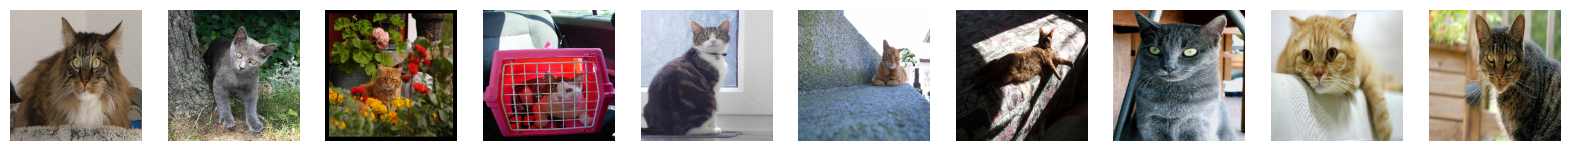

Reconstructions


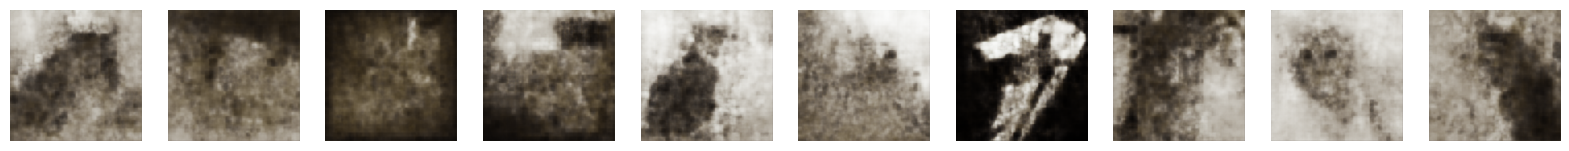

In [58]:
print("Example Cats")
display2(example_images[50:])
print("Reconstructions")
display2(predictions[50:])

In [59]:
embeddings = encoder.predict(example_images)
embeddings[:5]

4/4 [==============================] - 0s 18ms/step


array([[-0.8356431 ,  1.0324982 , -1.8793379 , -1.7610636 ,  0.2650077 ,
         0.32300344,  0.43819484, -3.3272724 ,  2.187971  ,  1.9271427 ],
       [ 0.98350376, -0.2472793 , -0.5081055 ,  1.20868   ,  0.764388  ,
        -0.0607306 , -1.1575652 , -0.43331727, -0.10350086, -0.54373604],
       [ 5.920935  ,  1.4479445 ,  0.6087728 , -5.7716546 ,  0.08302284,
        -0.70372385,  3.9831376 ,  1.2426684 ,  0.88784266, -0.5038799 ],
       [ 1.3706175 ,  0.41478753, -1.0322342 ,  0.41621295, -1.5489396 ,
        -0.5421012 ,  0.09096184,  2.4336128 , -0.5113874 , -1.6097152 ],
       [ 1.4554975 ,  1.8038591 ,  0.22121589,  0.7642595 ,  1.3630357 ,
         0.47236302, -0.37377065,  0.2531254 , -0.15992472,  0.4783719 ]],
      dtype=float32)

In [54]:
reconstructions = decoder.predict([[5.920935  ,  1.4479445 ,  0.6087728 , -5.7716546 ,  0.08302284,
        -0.70372385,  3.9831376 ,  1.2426684 ,  0.88784266, -0.5038799]])

1/1 [==============================] - 0s 29ms/step


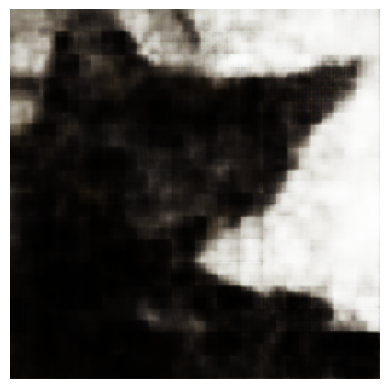

In [60]:
plt.imshow(reconstructions[0])
plt.axis(False);